In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
data.info

<bound method DataFrame.info of      car_ID                   CarName fueltype aspiration      carbody  \
0         1        alfa-romero giulia      gas        std  convertible   
1         2       alfa-romero stelvio      gas        std  convertible   
2         3  alfa-romero Quadrifoglio      gas        std    hatchback   
3         4               audi 100 ls      gas        std        sedan   
4         5                audi 100ls      gas        std        sedan   
..      ...                       ...      ...        ...          ...   
200     201           volvo 145e (sw)      gas        std        sedan   
201     202               volvo 144ea      gas      turbo        sedan   
202     203               volvo 244dl      gas        std        sedan   
203     204                 volvo 246   diesel      turbo        sedan   
204     205               volvo 264gl      gas      turbo        sedan   

    drivewheel enginelocation  wheelbase  carlength  carwidth  ...  \
0        

In [5]:
data.isnull().sum()

car_ID              0
CarName             0
fueltype            0
aspiration          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.select_dtypes(include =['object'])

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,six,idi


In [7]:
list(data.CarName.unique())

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

In [8]:
#Values have some spelling inconsistencies
#CarName consists of two parts - the first word is 'car company' name and the second is 'car model'
#Splitting CompanyName from CarName
data.CarName = data.CarName.apply(lambda x: x.split(' ')[0])
data.CarName.replace('maxda','mazda',inplace=True)
data.CarName.replace('Nissan','nissan',inplace=True)
data.CarName.replace('porcshce','porsche',inplace=True)
data.CarName.replace('toyouta','toyota',inplace=True)
data.CarName.replace('vokswagen','volkswagen',inplace=True)
data.CarName.replace('vw','volkswagen',inplace=True)

data=data.rename(columns={'CarName':'CompanyName'})


In [9]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
pip install wordtodigits

Note: you may need to restart the kernel to use updated packages.


In [12]:
import wordtodigits

In [13]:
#Converting Words to Digits
data.cylindernumber = data.cylindernumber.apply(lambda x: int(wordtodigits.convert(x)))
data.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


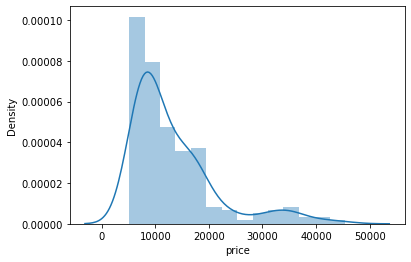

In [14]:
sns.distplot(data['price'])
plt.show()

In [15]:
data.drop('car_ID',axis=1,inplace=True)

In [16]:
numeric_data=data.select_dtypes(include=['int64','float64'])

In [17]:
numeric_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


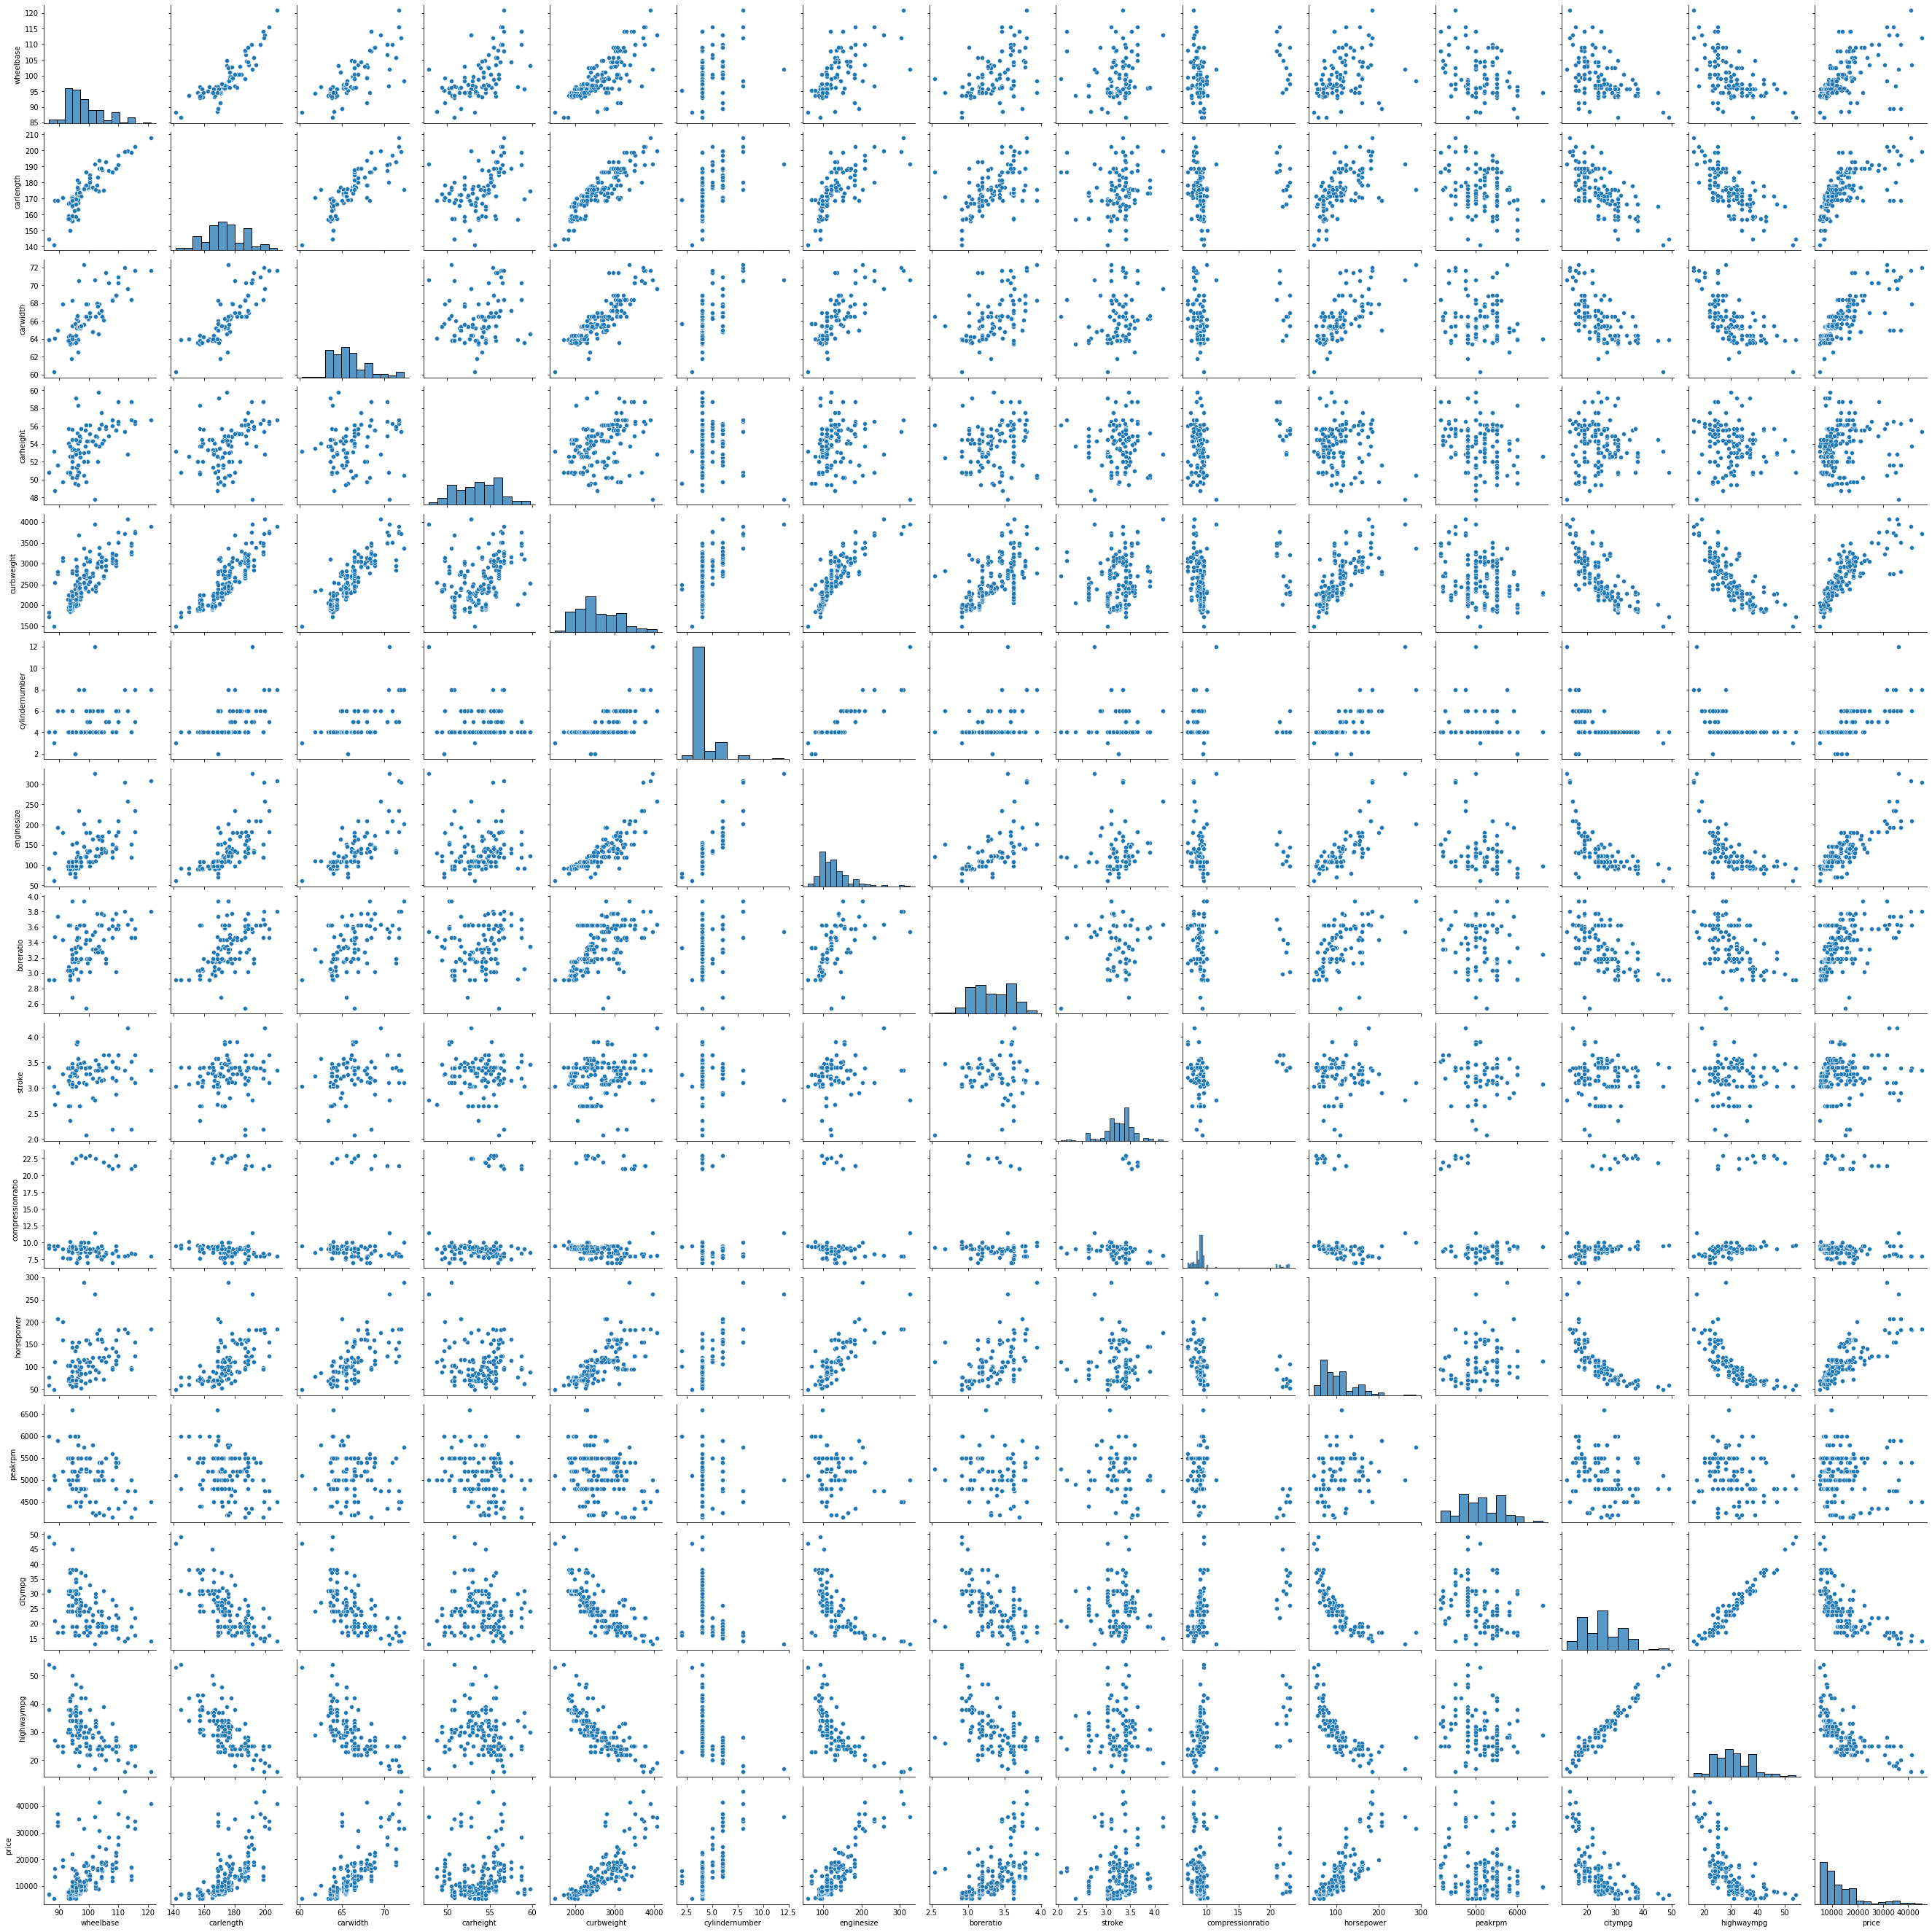

In [18]:
sns.pairplot(numeric_data)
plt.show()

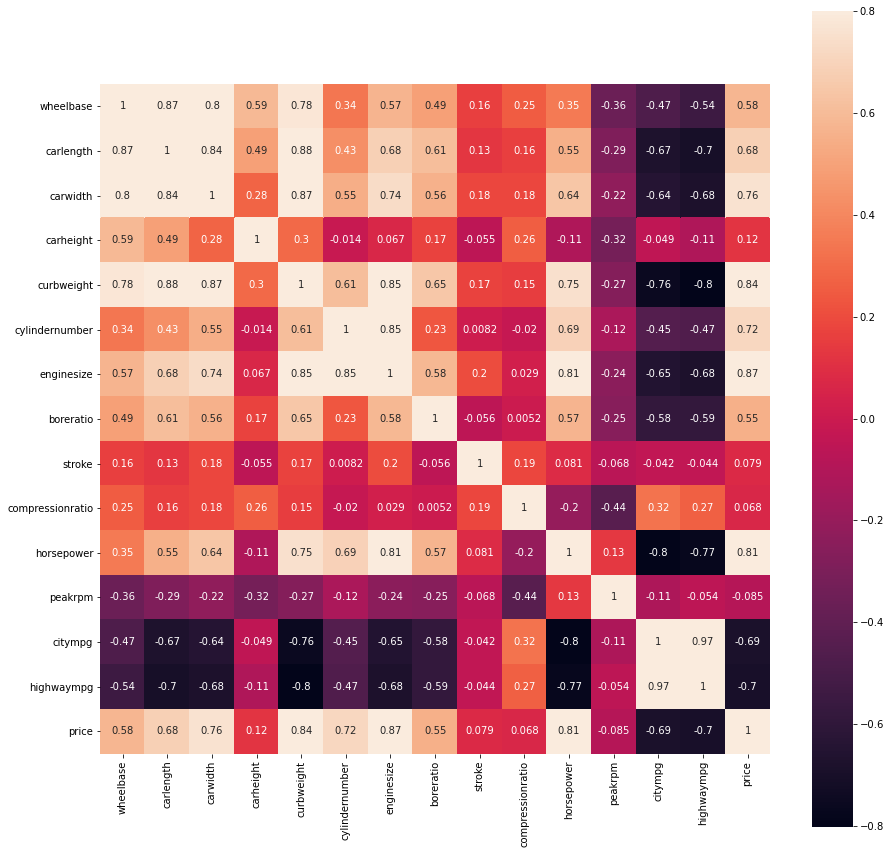

In [19]:
fig=plt.figure(figsize=(15,15))
dataset=numeric_data.corr()
sns.heatmap(dataset,vmax=.8,square=True,annot=True)
plt.show()

In [20]:
cat_data = data.select_dtypes(include = ['object'])
cat_data.head()

,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


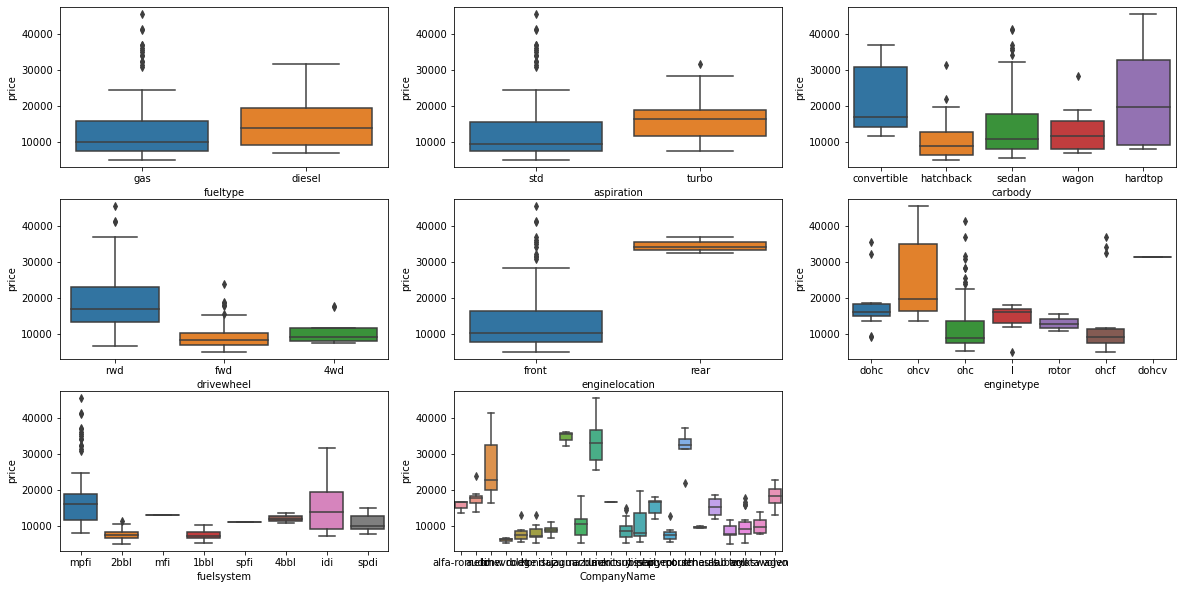

In [21]:
plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'CompanyName', y = 'price', data = data)

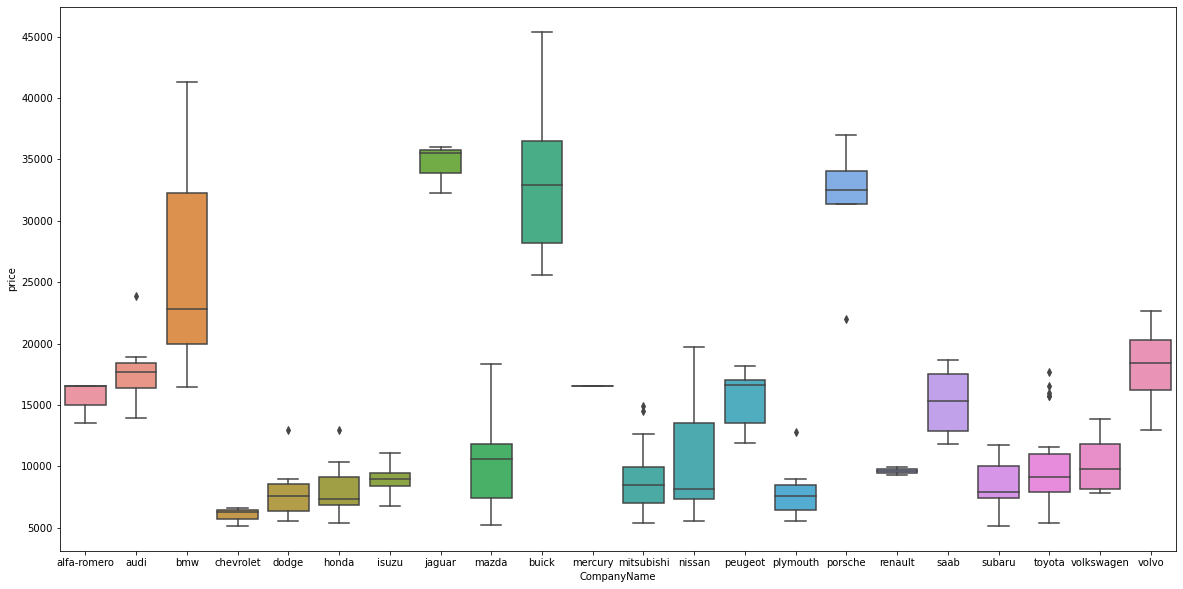

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'CompanyName', y = 'price', data = data)

In [23]:
data_p = pd.get_dummies(cat_data, drop_first=True)
data=data.drop(cat_data.columns,axis=1)
data_prep = pd.concat([data,data_p],axis=1)

In [24]:
data_prep.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X=data_prep.drop('price',axis=1)
y=data_prep['price']

In [26]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 57) (41, 57) (164,) (41,)


In [28]:
#Scaling the Data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [30]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor(n_estimators=100,random_state=0)


In [31]:
lr_reg=lr.fit(X_train,y_train)
lasso_reg=lasso.fit(X_train,y_train)
ridge_reg=ridge.fit(X_train,y_train)
rf_reg= rf.fit(X_train,y_train)

In [32]:
r2_score(lr_reg.predict(X_test),y_test)

0.7966790430513706

In [33]:
scores=[rf_reg.score(X_test,y_test),lr_reg.score(X_test,y_test),lasso_reg.score(X_test,y_test)
        ,ridge_reg.score(X_test,y_test)]

In [34]:
df=pd.DataFrame({'Model':['Random Forest Regression','Linear Regression','Lasso Regression','Ridge Rgeression'],
                'R2 Score':scores})
df

,Model,R2 Score
0,Random Forest Regression,0.912007
1,Linear Regression,0.826133
2,Lasso Regression,0.826413
3,Ridge Rgeression,0.829170


In [35]:
def test(models, X_train,y_train):
    results = {}
    for i in models:
        r2_test = []
        r2_test.append(r2_score(y_test,models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            
        results[i] = r2_test
    return pd.DataFrame(results)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
lasso_params = {'alpha':np.linspace(0.02,0.05,20)}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 280 ,290, 300, 400,500]}
rf_params ={'n_estimators':[50,100,200,300,500],
           'max_features':["auto", "sqrt", "log2"],
           'max_depth':[3,5,6,7,8,10]}

models={
   "Ridge":GridSearchCV(Ridge(), 
                               param_grid=ridge_params).fit(X_train, y_train).best_estimator_,

    "Lasso":GridSearchCV(Lasso(), 
                               param_grid=lasso_params).fit(X_train, y_train).best_estimator_,
           
    "RandomForestRegressor":GridSearchCV(RandomForestRegressor(), 
                               param_grid=rf_params).fit(X_train, y_train).best_estimator_
}

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21682953.889940098, tolerance: 791629.5984416031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30998959.13404259, tolerance: 1006035.3048895524
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127318899.16027465, tolerance: 976558.4979184922
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWar

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35954005.30198115, tolerance: 845405.1159420768
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42699866.47760557, tolerance: 909085.7795866816
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13144244.735766217, tolerance: 791629.5984416031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9105827.848179221, tolerance: 791629.5984416031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26313564.33035803, tolerance: 1006035.3048895524
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113110161.51982555, tolerance: 976558.4979184922
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19683500.66589722, tolerance: 845405.1159420768
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25526234.159115493, tolerance: 909085.7795866816
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35912760.40701562, tolerance: 1133181.643675074
  model = cd_fast.enet_coordinate_descent(


In [38]:
test(models,X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35912760.40701562, tolerance: 1133181.643675074
  model = cd_fast.enet_coordinate_descent(


,Ridge,Lasso,RandomForestRegressor
0,0.837864,0.827876,0.911433


In [39]:
models['RandomForestRegressor']

RandomForestRegressor(max_depth=10, max_features='sqrt')

In [40]:
model = models['RandomForestRegressor'].fit(X_train,y_train)
y_pred = model.predict(X_test)

Text(0, 0.5, 'predicted')

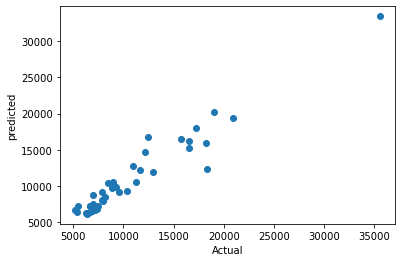

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')